In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv("fake_news.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [29]:
data.shape

(20800, 5)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [31]:
data.isna().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [32]:
data = data.drop('id', axis = 1)

In [33]:
data = data.fillna('')

In [34]:
data['content'] = data['author'] + data['title'] + data['text']

In [35]:
data = data.drop(['title', 'author', 'text'], axis = 1)

In [ ]:
data.head()

,label,content
0,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,1,Consortiumnews.comWhy the Truth Might Get You ...
3,1,Jessica Purkiss15 Civilians Killed In Single U...
4,1,Howard PortnoyIranian woman jailed for fiction...


In [37]:
data['content'] = data['content'].astype(str)

In [38]:
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [39]:
data['content'] = data['content'].str.replace('[^\w\s]','')

In [40]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords
stop  = stopwords.words('english')
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [42]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
data['content'] = data['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['content'].head()

,content
0,darrell lucushouse dem aide: didn’t even see c...
1,"daniel j. flynnflynn: hillary clinton, big wom..."
2,consortiumnews.comwhy truth might get firedwhy...
3,jessica purkiss15 civilian killed single u air...
4,howard portnoyiranian woman jailed fictional u...


In [43]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
data['content'] = data['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['content'].head()

,content
0,darrell lucushouse dem aide: didn’t even see c...
1,"daniel j. flynnflynn: hillary clinton, big wom..."
2,consortiumnews.comwhy truth might get firedwhy...
3,jessica purkiss15 civilian killed single u air...
4,howard portnoyiranian woman jailed fictional u...


In [44]:
X=data['content']
y=data['label']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45, stratify=y)

In [47]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(14560,)
(14560,)
(6240,)
(6240,)


MODEL BUILDING

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(data['content'])
xtrain_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [55]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
pclf = PassiveAggressiveClassifier()
pclf.fit(xtrain_tfidf, y_train)
predictions = pclf.predict(X_test_tfidf)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3116
           1       0.95      0.95      0.95      3124

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



In [56]:
print(metrics.confusion_matrix(y_test, predictions))

[[2962  154]
 [ 158 2966]]


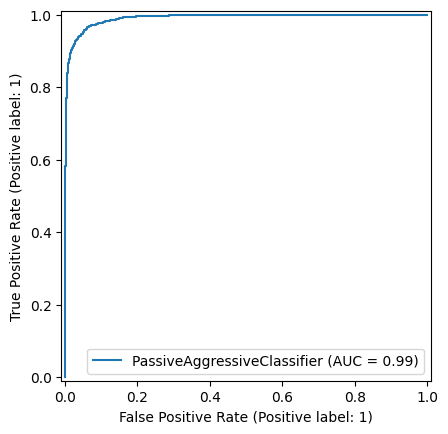

In [61]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pclf, X_test_tfidf, y_test)  # Changed xtest_tfidf to X_test_tfidf
plt.show()

In [63]:
from sklearn.neural_network import MLPClassifier
mlpclf = MLPClassifier(hidden_layer_sizes = (256, 64, 16), activation = 'relu', solver = 'adam')
mlpclf.fit(xtrain_tfidf, y_train)
predictions = mlpclf.predict(X_test_tfidf) # Changed xtest_tfidf to X_test_tfidf
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3116
           1       0.96      0.95      0.95      3124

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



In [64]:
print(metrics.confusion_matrix(y_test,predictions))

[[2980  136]
 [ 153 2971]]


In [65]:
import pickle
pickle.dump(mlpclf, open("fakenews1.pkl", "wb"))

In [66]:
loaded_model = pickle.load(open("fakenews1.pkl", 'rb'))

X_test_tfidf = tfidf_vect.transform(X_test)
result = loaded_model.score(X_test_tfidf, y_test)
print(result)

0.9536858974358975
